The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
1
results/BEST/MGDL_grade4_lrparams5.00e-03_beta1.00e+00_lambd1.00e-02_psnr3.1668e+01_loss2.8502e+02.pickle
----------------results/BEST/MGDL_grade4_lrparams5.00e-03_beta1.00e+00_lambd1.00e-02_psnr3.1668e+01_loss2.8502e+02.pickle-----------------
noise level: 0.0392156862745098
dict_keys(['grade1', 'grade2', 'grade3', 'grade4'])


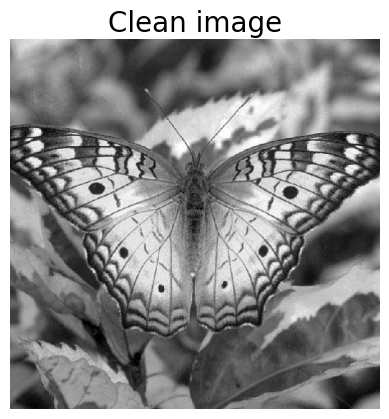

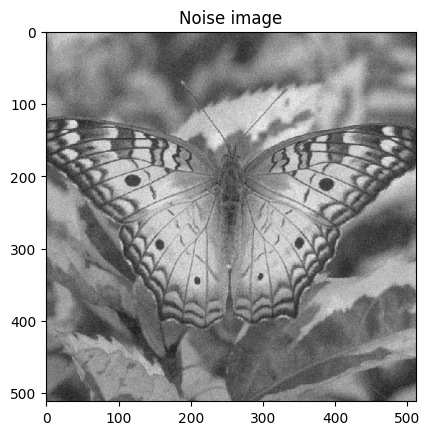

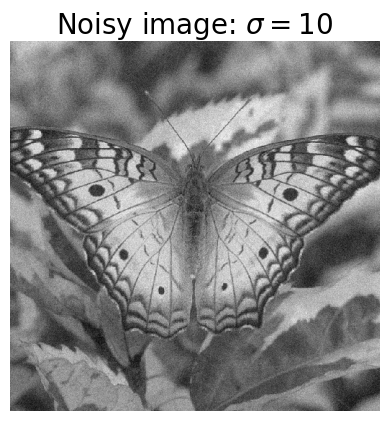

/home/rfang002/EigenvalueComputationHessian/MGDLEXAMPLE/IMAGEDENOISING/Butterfly/MGDL_Butterfly_Noise10R1/mgdlmodel.py:55: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  noisyPSNR = psnr(img, train_y)


noisy PSNR 28.12138455312267
at grade 1, PSNR is 21.961816787719727, train_losses is 1054.6497802734375, scaleFactor is 0.08879193663597107, time: 259.124813079834


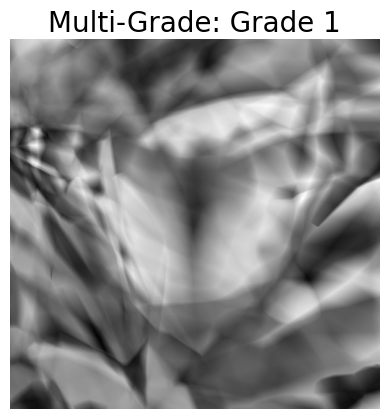

at grade 2, PSNR is 27.68393898010254, train_losses is 468.42352294921875, scaleFactor is 0.05527329444885254, time: 292.6950843334198


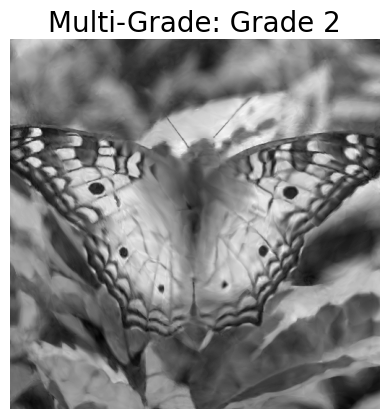

at grade 3, PSNR is 30.65117645263672, train_losses is 332.9676208496094, scaleFactor is 0.04375450313091278, time: 293.3041982650757


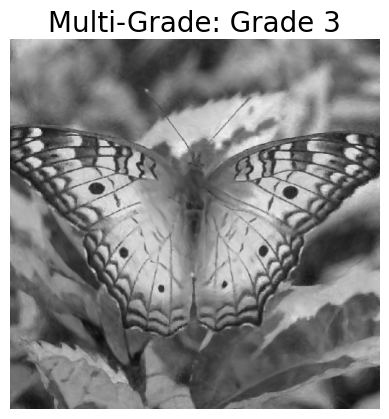

at grade 4, PSNR is 31.668092727661133, train_losses is 285.0195007324219, scaleFactor is 0.03816617280244827, time: 293.98414874076843


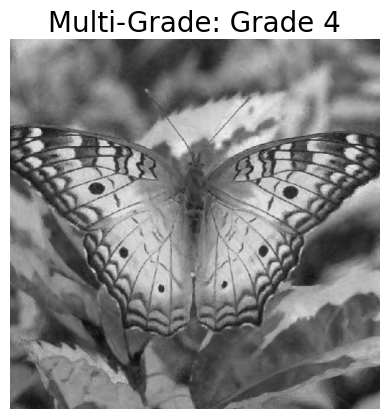

the total time is 1139.108244419098


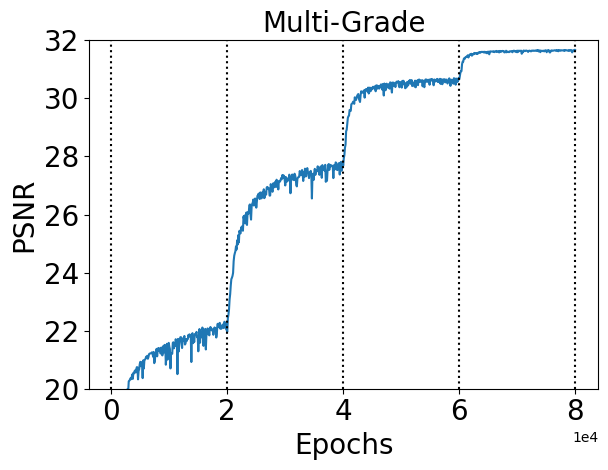

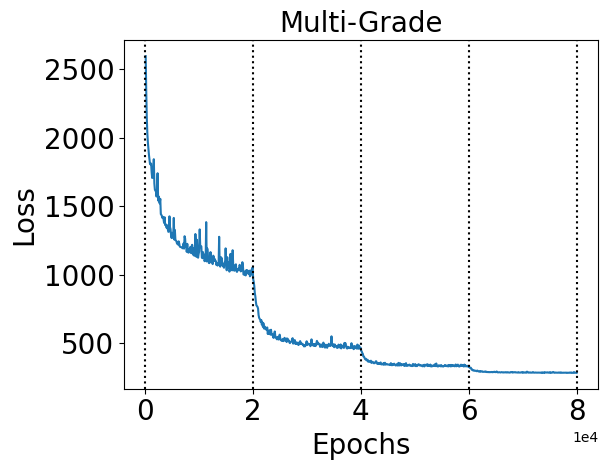

In [2]:
from mgdlmodel import analysis, data_setup
import glob
import shutil
import pickle
import os

%matplotlib inline
%load_ext autoreload
%autoreload 2

grade = 4
savefilename = False

# path = 'results/*.pickle'

path = 'results/BEST/*.pickle'

picklefile = []
for file in glob.glob(path):  
    picklefile.append(file) 

print(len(picklefile))
k=5
picklefile =sorted(picklefile, key=lambda x: float(x.split('_')[k][len("psnr"):len("psnr2.0129e+01")]), reverse=True)

output_txt = f'results/grade{grade}_sorted_PSNR.txt'
if savefilename:
    with open(output_txt, 'w') as f:
        for file in picklefile:
            f.write(file + '\n')  #

for file in picklefile:
    #resave(file)
    print(file)

LossPsnr_print = True
Fig_print = True
# num = len(picklefile)
num = min(10, len(picklefile))
for i in range(num):
    filepath = picklefile[i]
    print(f'----------------{filepath}-----------------')
    analysis(filepath, LossPsnr_print, Fig_print, grade)
    # resave(filepath, grade)

%reset -f